In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(9, 6)})

In [2]:
# данные о действиях, которые совершают студенты со степами:
# переход на степ, просмотр степа, начало попытки решения степа, удачное решение
df_events = pd.read_csv('event_data_train.csv')

In [3]:
# данные о времени и статусах сабмитов (решений) к практическим занятиям
df_sub = pd.read_csv('submissions_data_train.csv')

In [4]:
df_events.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [5]:
df_sub.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


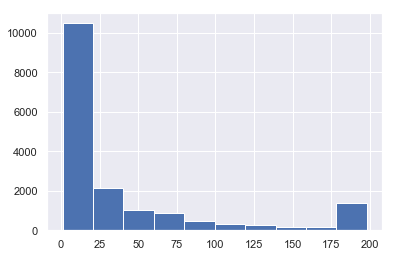

In [6]:
# количество пользователей, которые набрали определенное число очков
df_events[df_events.action=='passed'].groupby('user_id', as_index=False) \
.agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [7]:
# 1
df_events['date']=pd.to_datetime(df_events.timestamp, unit='s')
df_events['date']

0         2015-06-15 04:00:48
1         2015-06-15 04:00:48
2         2015-06-15 04:00:48
3         2015-06-15 04:01:35
4         2015-06-15 04:01:35
5         2015-06-15 04:01:35
6         2015-06-15 04:02:01
7         2015-06-15 04:02:01
8         2015-06-15 04:02:19
9         2015-06-15 04:02:24
10        2015-06-15 04:02:30
11        2015-06-15 04:02:30
12        2015-06-15 04:02:30
13        2015-06-15 04:03:11
14        2015-06-15 04:03:11
15        2015-06-15 04:03:36
16        2015-06-15 04:03:59
17        2015-06-15 04:04:04
18        2015-06-15 04:04:04
19        2015-06-15 04:04:04
20        2015-06-15 04:04:23
21        2015-06-15 04:04:23
22        2015-06-15 04:04:23
23        2015-06-15 04:04:58
24        2015-06-15 04:04:58
25        2015-06-15 04:04:58
26        2015-06-15 04:05:07
27        2015-06-15 04:05:07
28        2015-06-15 04:05:07
29        2015-06-15 04:06:35
                  ...        
3480673   2018-05-19 22:55:32
3480674   2018-05-19 22:55:43
3480675   

In [8]:
df_events['day'] = df_events.date.dt.date
df_events['day'] 

0          2015-06-15
1          2015-06-15
2          2015-06-15
3          2015-06-15
4          2015-06-15
5          2015-06-15
6          2015-06-15
7          2015-06-15
8          2015-06-15
9          2015-06-15
10         2015-06-15
11         2015-06-15
12         2015-06-15
13         2015-06-15
14         2015-06-15
15         2015-06-15
16         2015-06-15
17         2015-06-15
18         2015-06-15
19         2015-06-15
20         2015-06-15
21         2015-06-15
22         2015-06-15
23         2015-06-15
24         2015-06-15
25         2015-06-15
26         2015-06-15
27         2015-06-15
28         2015-06-15
29         2015-06-15
              ...    
3480673    2018-05-19
3480674    2018-05-19
3480675    2018-05-19
3480676    2018-05-19
3480677    2018-05-19
3480678    2018-05-19
3480679    2018-05-19
3480680    2018-05-19
3480681    2018-05-19
3480682    2018-05-19
3480683    2018-05-19
3480684    2018-05-19
3480685    2018-05-19
3480686    2018-05-19
3480687   

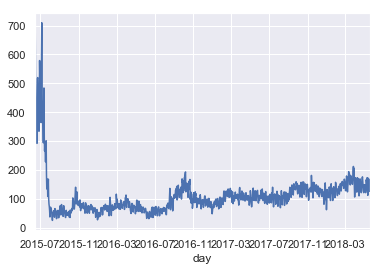

In [9]:
# сколько пользователей в какой день записалось
df_events.groupby('day').user_id.nunique().plot()

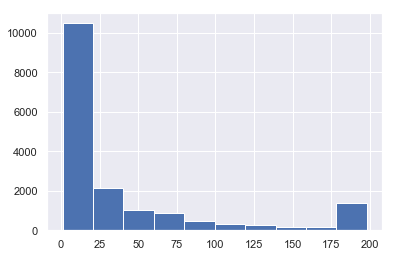

In [10]:
# распределим пользователей по набранным баллам за курс
df_events.head()
# отберем юзеров, которые прошли курс
# неправильно
df_events[df_events['action']=='passed'].groupby('user_id', as_index=False).agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'}).passed_steps.hist()

In [11]:
# 2 подсчёт событий для каждого юзера
# правильно
users_events_data = df_events.pivot_table(index='user_id',
                      columns='action',
                      values='step_id',
                      aggfunc='count',
                      fill_value=0).reset_index()
users_events_data.head(20)

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
5,8,109,84,37,156
6,9,3,3,0,4
7,11,1,0,1,1
8,14,4,3,1,9
9,16,196,196,108,651


In [12]:
# 3
df_sub['date']=pd.to_datetime(df_sub.timestamp, unit='s')
df_sub['date']

0        2015-06-15 06:21:15
1        2015-06-15 06:05:00
2        2016-11-11 08:15:49
3        2016-11-11 08:16:04
4        2015-06-15 06:02:03
5        2015-06-15 06:03:08
6        2016-11-11 08:14:15
7        2015-06-15 05:49:31
8        2015-06-15 06:33:01
9        2015-06-16 09:14:51
10       2015-06-16 09:19:37
11       2015-06-16 08:59:45
12       2015-06-16 10:24:37
13       2015-06-16 10:19:34
14       2015-06-17 06:09:51
15       2015-06-15 10:17:45
16       2015-06-15 10:18:05
17       2015-06-16 06:47:18
18       2015-06-16 10:27:50
19       2015-06-15 10:20:01
20       2016-11-11 12:46:17
21       2015-06-15 10:21:37
22       2016-11-11 12:48:14
23       2015-06-15 10:22:30
24       2015-06-17 05:49:08
25       2015-06-16 06:51:14
26       2015-06-16 06:54:43
27       2016-11-12 06:58:31
28       2015-06-16 07:02:45
29       2016-11-12 07:18:27
                 ...        
509074   2016-10-18 05:15:14
509075   2016-10-27 23:17:49
509076   2016-10-27 23:18:26
509077   2016-

In [37]:
# 4 сведения о каждом юзере - сколько было успешных\неуспешных попыток 
# выполнения задания
users_scores = df_sub.pivot_table(index='user_id', # колонка, по которой группируем
                                  columns='submission_status', # значения чего мы группируем - # первый столбец (просто с нумерацией от 0 до n?)
                                 values='step_id', # PK в той таблице, для которой составляем pivot_table
                                  aggfunc='count', # какая агрегирующая функция применяется
                                 fill_value=0).reset_index() # заполняем nan нулями
users_scores.head(100)


submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
5,16,77,106
6,17,0,2
7,22,76,47
8,25,1,4
9,26,7,16


In [14]:
# 1. сколько уникальных степов, сколько правильное и неправильное число сабмитов,
# сколько уникальных дней учился на степике
# 2. посмотрим, насколько отличаются эти показатели у тех кто закончил курс,
# и у тех, кто его бросил - ключевые моменты


In [15]:
# рассчитать, какие промежутки были у пользователя в перерывах между уникальными днями, когда он проходил курс,
# принять статистическое решение - какой промежуток временной должен быть у 
# пользователя, после которого можно считать его дропнувшимся - ушедшим с курса?
# для каждого user_id выподятся его timestamp-ы
df_events[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'].apply(list).head()

user_id
1                                         [1472827464]
2                             [1514383364, 1519226966]
3    [1434358476, 1441257725, 1441440209, 144153391...
5                             [1466156809, 1499859621]
7                                         [1521634660]
Name: timestamp, dtype: object

In [41]:
# 5 промежутки между timestamp-ами: разницы между двумя днями, в которых юзер был на курсе
gap_data = df_events[['user_id', 'day', 'timestamp']]\
.drop_duplicates(subset=['user_id', 'day'])\
.groupby('user_id')['timestamp']\
.apply(list)\
.apply(np.diff)\
.values
#  
gap_data=pd.Series(np.concatenate(gap_data, axis=0))
# перевод в дни
gap_data=gap_data / (24*60*60)
gap_data.head(10)

0     56.060208
1     79.852419
2      2.112083
3      1.084606
4     32.047106
5      1.983796
6      0.911019
7    390.078843
8      9.994028
9      0.589468
dtype: float64

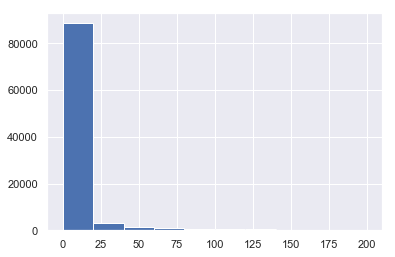

In [17]:
gap_data[gap_data<200].hist()


In [46]:
# только 5 процентов пользователей возвращаются на курс после перерыва в 2 месяца (60 дней)
gap_data.quantile(0.90) #в какое значение вр. промежутка укладывается 90% юзеров?

18.325995370370403

In [19]:
df_events.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [20]:
# ЗАДАНИЕ вывести id пользователя, который заходил каждый день 
df_events[df_events.action=='viewed'].groupby('user_id', as_index=False).agg({'day':'count'}).sort_values('day', ascending=False, axis=0)

,user_id,day
15001,20907,32778
7777,10794,16089
18144,25279,9693
781,1046,8122
2609,3572,6968
8466,11770,6330
6876,9546,5915
553,761,4281
6041,8363,3492
4902,6764,2960


In [21]:
# 6 максимальный timestamp для каждого пользователя
users_data=df_events.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})
users_data['is_gone_user'] = 1526772811 - users_data.last_timestamp

In [22]:
dropout_treshold = 24*60*60*30
print dropout_treshold
# момент выгрузки данных - самое последнее значение таймстемпа датасета
now=df_events.timestamp[len(df_events)-1]
print now

# сколько времени прошло с последнего посещения пользователя на текущий день - 
# определяет, больше это число чем 30 дней, или нет

users_data['isgone']=(now - users_data.last_timestamp) > dropout_treshold
users_data.head(50)
# пороговое значение, выше которого будем считать что пользователь дропнулся (1 мес. в мс)


2592000
1526772811


,user_id,last_timestamp,is_gone_user,isgone
0,1,1472827464,53945347,True
1,2,1519226966,7545845,True
2,3,1444581588,82191223,True
3,5,1499859939,26912872,True
4,7,1521634660,5138151,True
5,8,1481466913,45305898,True
6,9,1484999497,41773314,True
7,11,1526140625,632186,False
8,14,1436368676,90404135,True
9,16,1513162585,13610226,True


In [23]:
# АНАЛОГ JOIN объединяем таблицы users_data и users_score
# с помощью outer добавляем тех юзеров, которые не сделали попыток заданий
# ON - по какому столбцу объединяем
fin_users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [24]:
fin_users_data.fillna(0, inplace=True)

In [25]:
fin_users_data.head()

,user_id,last_timestamp,is_gone_user,isgone,correct,wrong
0,1,1472827464,53945347,True,0.0,0.0
1,2,1519226966,7545845,True,2.0,0.0
2,3,1444581588,82191223,True,29.0,23.0
3,5,1499859939,26912872,True,2.0,2.0
4,7,1521634660,5138151,True,0.0,0.0


In [26]:
# сколько всего дней юзер был на степике (для каждого юзера)
users_days = df_events.groupby('user_id').day.nunique().to_frame().reset_index()

In [27]:
# добавляем информацию о попытках
users_data = users_data.merge(users_events_data, how='outer')
users_data.head(10)

,user_id,last_timestamp,is_gone_user,isgone,discovered,passed,started_attempt,viewed
0,1,1472827464,53945347,True,1,0,0,1
1,2,1519226966,7545845,True,9,9,2,10
2,3,1444581588,82191223,True,91,87,30,192
3,5,1499859939,26912872,True,11,11,4,12
4,7,1521634660,5138151,True,1,1,0,1
5,8,1481466913,45305898,True,109,84,37,156
6,9,1484999497,41773314,True,3,3,0,4
7,11,1526140625,632186,False,1,0,1,1
8,14,1436368676,90404135,True,4,3,1,9
9,16,1513162585,13610226,True,196,196,108,651


In [28]:
users_data = users_data.merge(users_days, how='outer')
users_data.head()

,user_id,last_timestamp,is_gone_user,isgone,discovered,passed,started_attempt,viewed,day
0,1,1472827464,53945347,True,1,0,0,1,1
1,2,1519226966,7545845,True,9,9,2,10,2
2,3,1444581588,82191223,True,91,87,30,192,7
3,5,1499859939,26912872,True,11,11,4,12,2
4,7,1521634660,5138151,True,1,1,0,1,1


In [29]:
df_events.user_id.nunique()
# проверять на каждом этапе, все ли данные на месте (с помощью количества, например)

19234

In [30]:
users_data['passed']


0          0
1          9
2         87
3         11
4          1
5         84
6          3
7          0
8          3
9        196
10         5
11         2
12         8
13       198
14         1
15        20
16        25
17         1
18       198
19        24
20        13
21         3
22       195
23         1
24         9
25         0
26       198
27         1
28         1
29        89
        ... 
19204      7
19205      1
19206      2
19207    193
19208     11
19209     73
19210      8
19211      0
19212     86
19213      0
19214     30
19215      1
19216      1
19217     16
19218    191
19219      9
19220    196
19221    198
19222     18
19223     10
19224    135
19225     31
19226     17
19227      1
19228      2
19229      8
19230      0
19231     69
19232     10
19233     12
Name: passed, Length: 19234, dtype: int64

In [31]:
users_data['passed_course']=users_data.passed > 170

In [32]:
# итоговое число юзеров, прошедших курс (если набрали больше 170 баллов)
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,isgone,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425
